In [ ]:
#NASA data is found in format nc4. Since data may come from NLP in different formats (not know yet at this stage in project stream), there may be a need to convert to different more common formats from nc4, and the reverse to visualize with NASA data Panoply
#This Code is the staging area for conversions and recombination of the data. Uses Plotly, Cartopy, xArray, numpy, and pandas

!pip install plotly
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 37.1 MB/s eta 0:00:00


In [ ]:
#@title Mount Google Drive (You don't need to run this if you are running notebooks on your laptop)

from google.colab import drive

# The following command will prompt a URL for you to click and obtain the
# authorization code

drive.mount("/content/drive")

# Set up data folder
from pathlib import Path

DATA = Path("/content/drive/My Drive/HWDataECBME")

Mounted at /content/drive


In [ ]:
#Open nc4 file using xarray, then convert it to CSV on the google drive for easier visualization, and to provide data headers to teammate

import xarray as xr
DS = xr.open_dataset(DATA / "HAQ_TROPOMI_NO2_GLOBAL_QA75_L3_Monthly_072024_V2.4_20240810.nc4") # Changed & to / to correctly combine the path and filename
# export csv
DS.to_dataframe().to_csv(DATA / "HAQ_TROPOMI_NO2_GLOBAL120824Export.csv")

Data Headers after NASA data convert to CSV

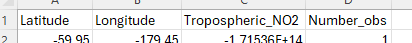

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
#This Code Will take Some Time
#Perform scatterplot using xarray. Results suboptimal

fig = plt.figure(figsize=(10, 5))  # Adjust figure size as needed
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add coastlines and land for context
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)

# Plot your data
# Assuming you want to plot 'Tropospheric_NO2' against 'Longitude' and 'Latitude',
# you need to specify 'x' and 'y' in your scatter plot call:

DS.plot.scatter(x='Longitude', y='Latitude', hue='Tropospheric_NO2', # Added 'x', 'y', and 'hue'
                ax=ax, transform=ccrs.PlateCarree(),
                cmap='viridis',
                cbar_kwargs={'label': 'Atmospheric NO2'})

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


Error in callback <function flush_figures at 0x7a8e2a6591b0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Above code will save out a CSV from a netCDF file. netCDF TO CSV IS POSSIBLE. THE REVERSE? The reverse should be possible to check the result, and to prep whatever data comes out of
# the NLP part to go into Panoply

In [ ]:
import plotly.express as px # Import the necessary module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Create the scatter plot using px.scatter_geo
# Use 'Tropospheric_NO2' or 'Number_obs' for size, or create a new 'size' column in your DataFrame.
# Here, we're using 'Tropospheric_NO2' for demonstration:
#fig = px.scatter_geo(df, lat='latitude', lon='longitude', size='Tropospheric_NO2')
#fig.update_geos(fitbounds="locations", visible=False)
#fig.show()

In [ ]:
# Pandas Setup / Read in Data / Activate plotly
import numpy as np
import pandas as pd

tropomi = pd.read_csv(DATA / "HAQ_TROPOMI_NO2_GLOBAL120824Export.csv")
tropomi.head()

,Latitude,Longitude,Tropospheric_NO2,Number_obs
0,-59.95,-179.45000,-1.715356e+14,1.0
1,-59.95,-179.34999,3.002292e+14,1.0
2,-59.95,-179.25000,4.545916e+14,1.0
3,-59.95,-179.15000,NaN,0.0
4,-59.95,-179.05000,NaN,0.0


In [ ]:
ds = xr.Dataset.from_dataframe(tropomi)

# Export the Dataset to a NetCDF file
ds.to_netcdf(DATA/ "outputtest.nc4")

#Current Problem is that the converted nc file above doesn't display as nicely in Panoply. Appear to be a data structure problem.

In [ ]:
# https://stackoverflow.com/questions/72139452/convert-csv-to-netcdf-in-python

In [ ]:
# Sample data arrived from Thomas. Visualizing it through plotly heatmap. This Code eventually makes it into producing the various heatmaps for final project

sample = pd.read_csv(DATA / "sample.csv")
sample.head()

,countries,Sentiment Score,Country_Mention_Count
0,Afghanistan,0.816066,29.0
1,Angola,0.640974,14.0
2,Argentina,0.995035,2.0
3,Australia,0.961174,6.0
4,Bangladesh,0.982776,8.0


In [ ]:
import plotly.express as px

# Assuming 'sample.csv' has columns 'country' and 'sentiment_score'
# Change 'color="Sentiment_Score"' to 'color="Sentiment Score"' to match the actual column name
fig = px.choropleth(sample, locations="countries",
                    locationmode='country names',
                    color="Sentiment Score",  # Corrected column name
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

#Research

https://naturaldisasters.ai/posts/python-geopandas-world-map-tutorial/

https://www.datacamp.com/tutorial/making-map-in-python-using-plotly-library-guide

https://medium.com/@kavee625/plotting-data-on-the-world-map-with-geopandas-f03742615196

https://python-graph-gallery.com/heatmap/

https://plotly.com/python/heatmaps/

https://www.youtube.com/watch?v=psvGW0cGBEc

https://www2.atmos.umd.edu/~cmartin/python/examples/netcdf_example1.html

https://www.geeksforgeeks.org/python-plotly-tutorial/

https://d32ogoqmya1dw8.cloudfront.net/files/teachearth/activities/attachment_7_panoply_manual.pdf

https://www.giss.nasa.gov/tools/panoply/

https://forum.earthdata.nasa.gov/viewtopic.php?t=3711

https://appliedsciences.nasa.gov/sites/default/files/2020-11/FloodMonitoring_PanoplyOrientation.pdf

https://www.syarawisharoni.com/archives/arc-articles/panoply

https://help.marine.copernicus.eu/en/articles/5425471-how-to-explore-copernicus-marine-products-with-panoply
